
# Machine Learning in Finance Cross Validation Model Evaluation

**Authors:**

<br> 

- **Rabin BK**
  - Matriculation Number: 23272000
  - IDM ID: yl03oxiq
  
<br> 
  
- **Yatin Arora**
  - Matriculation Number: 23014677
  - IDM ID: an79usew



## Setup and Imports
Importing the necessary libraries and modules for the analysis.


In [1]:
import sys
import os

sys.path.append('../')

In [44]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
# Import your custom modules here



## Custom Data Preparation and Cross-Validation Modules
Importing custom modules for data loading and cross-validation.


In [45]:

from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.cross_validation.time_gap_cross_validation import TimeGapCrossValidation

from src.finance_ml.cross_validation.walk_forward_cross_validation import WalkForwardCrossValidation
from src.finance_ml.cross_validation.purge_embargo_cross_validation import PurgeEmbargoCrossValidation



## Data Preparation
Preparing the dataset for analysis. This includes loading, cleaning, and preprocessing steps.


In [46]:
dataloader = DataLoader(time_index_col= 'DATE', 
                        keep_cols = ['VOLUME','OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW','TRANSACTIONS'])

fname_AAPL = 'equities/FB_2020-04-07_2022-04-06.parquet'
N = 20000
ticker = 'AAPL'
fname = fname_AAPL

df = dataloader.load_dataset({ticker:'../data/'+fname}).iloc[:N]
df = df.dropna()

X = df.drop('AAPL_VW', axis=1)
y = df['AAPL_VW']



## Cross-Validation Setup
preparing the cross-validation framework.


In [47]:

evaluation_metrics = [mean_squared_error, mean_absolute_error, r2_score, max_error]



### Time Gap Cross Validation
Defining the function for Time Gap Cross Validation.


In [48]:

def run_time_gap_cv(alpha: float, plot: bool = False):
    try:
        model = Lasso(alpha=alpha)
        gap_percentage = 0.10
        cv = TimeGapCrossValidation(num_folds=5)
        return cv.cross_validate(X, y, model, metrics=evaluation_metrics, gap_percentage=gap_percentage, plot=True)
    except Exception as e:
        return f"An error occurred: {str(e)}"


### Walk Forward Cross Validation
Defining the function for Walk Forward Cross Validation.


In [49]:

def run_walk_forward_cv(alpha, plot: bool = False):
    try:
        model = Lasso(alpha=alpha)
        num_folds = 5 # 5 folds
        cv = WalkForwardCrossValidation(num_folds=num_folds)
        return cv.cross_validate(X, y, model, metrics=evaluation_metrics, plot=True)
    except Exception as e:
        return f"An error occurred: {str(e)}"


### Purged Embargo Cross Validation
Defining the function for Purged Embargo Cross Validation.


In [50]:

def run_purged_embargo_cv(alpha: float, plot: bool = False):
    try:
        model = Lasso(alpha=alpha)
        num_folds = 5 # 5 folds
        embargo_ratio = 0.1 # 10% of the data will be embargoed
        cv = PurgeEmbargoCrossValidation(num_folds=num_folds, embargo_ratio=embargo_ratio)
        return cv.cross_validate(X, y, model, metrics=evaluation_metrics, plot=True)
    except Exception as e:
        return f"An error occurred: {str(e)}"


## Running Evaluations for Multiple Alphas
Evaluating the model with different alpha values using all Cross Validation methods.


Running evaluations for alpha=0.01
here
True


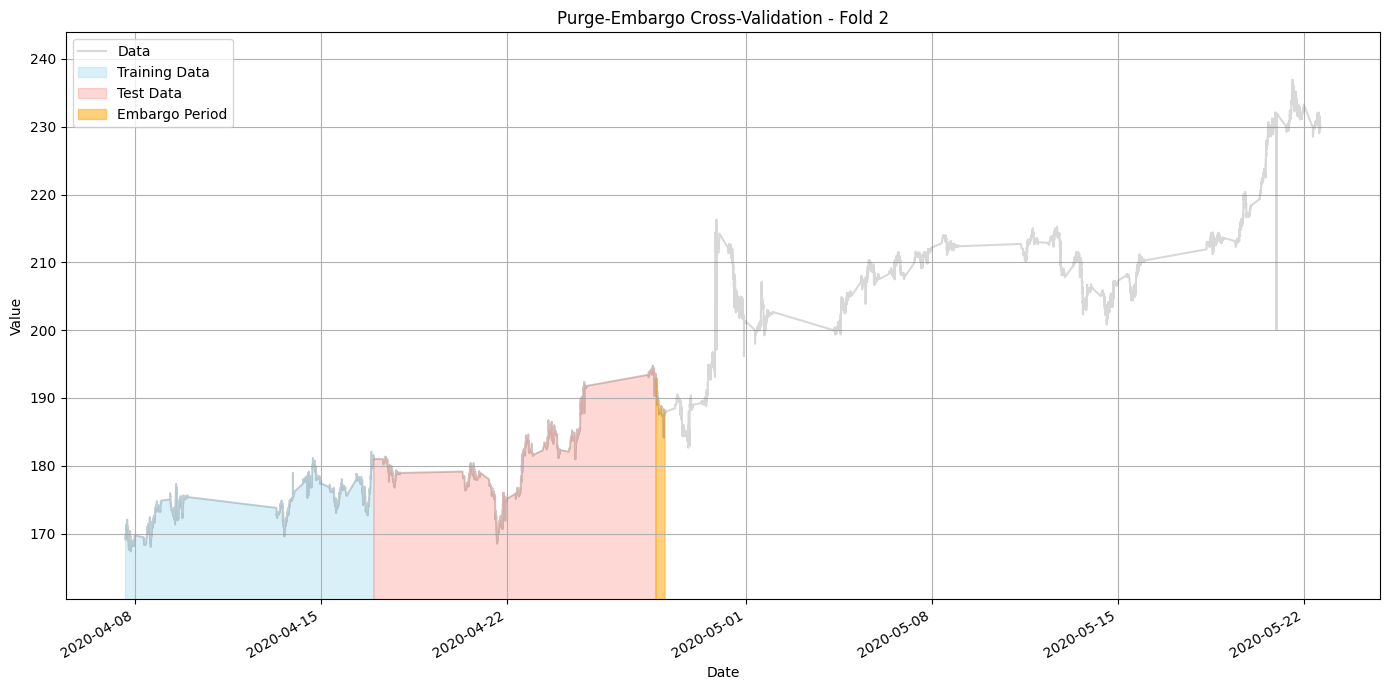

True


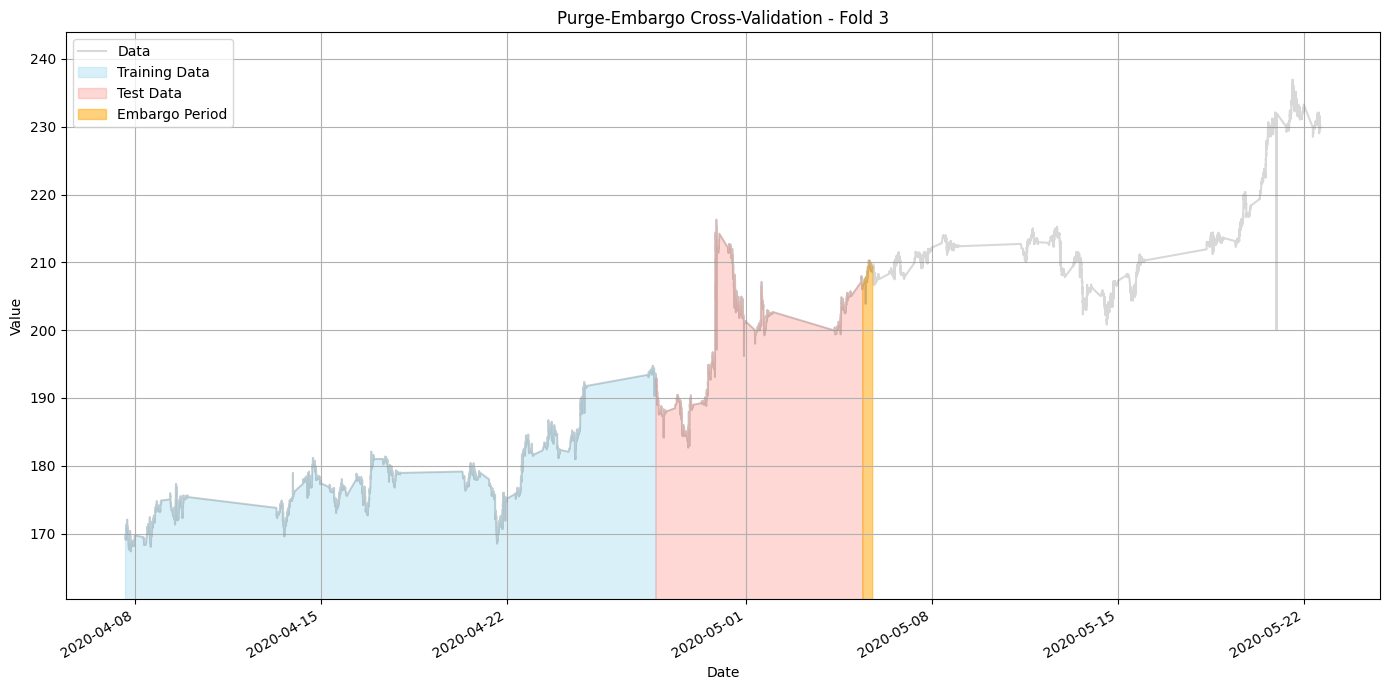

True


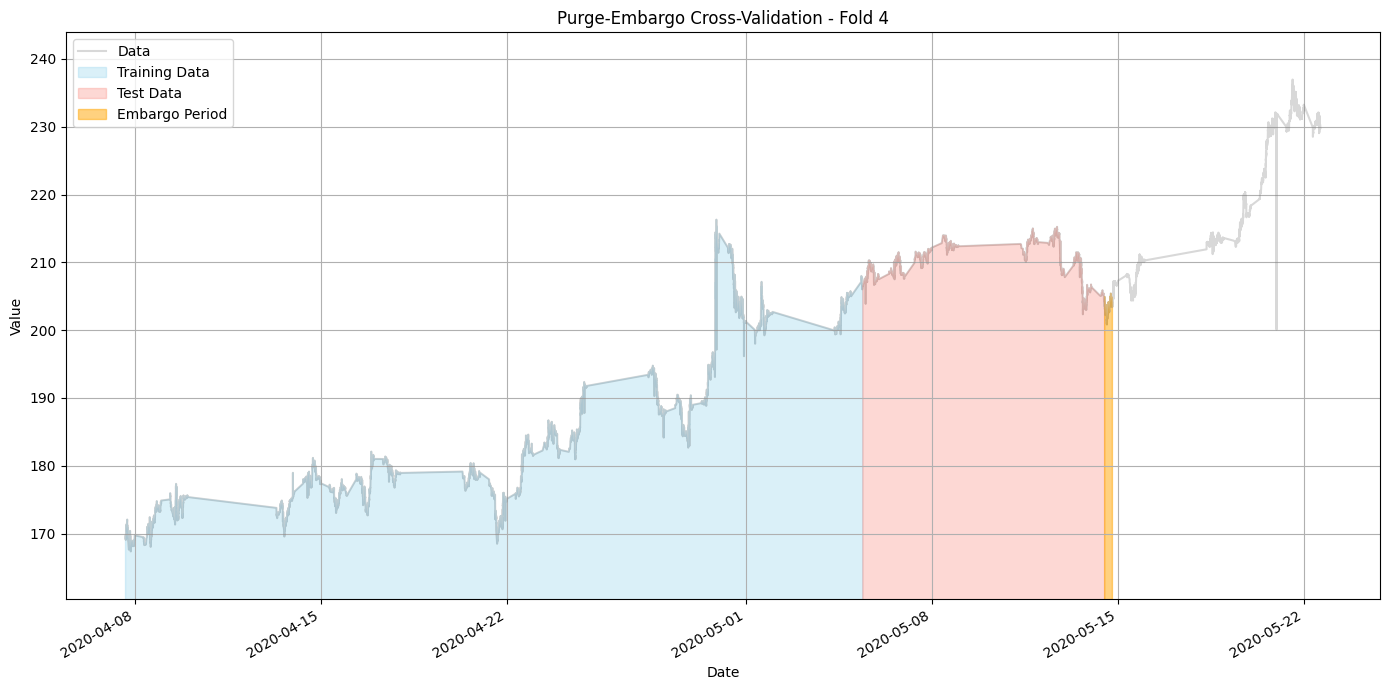

True


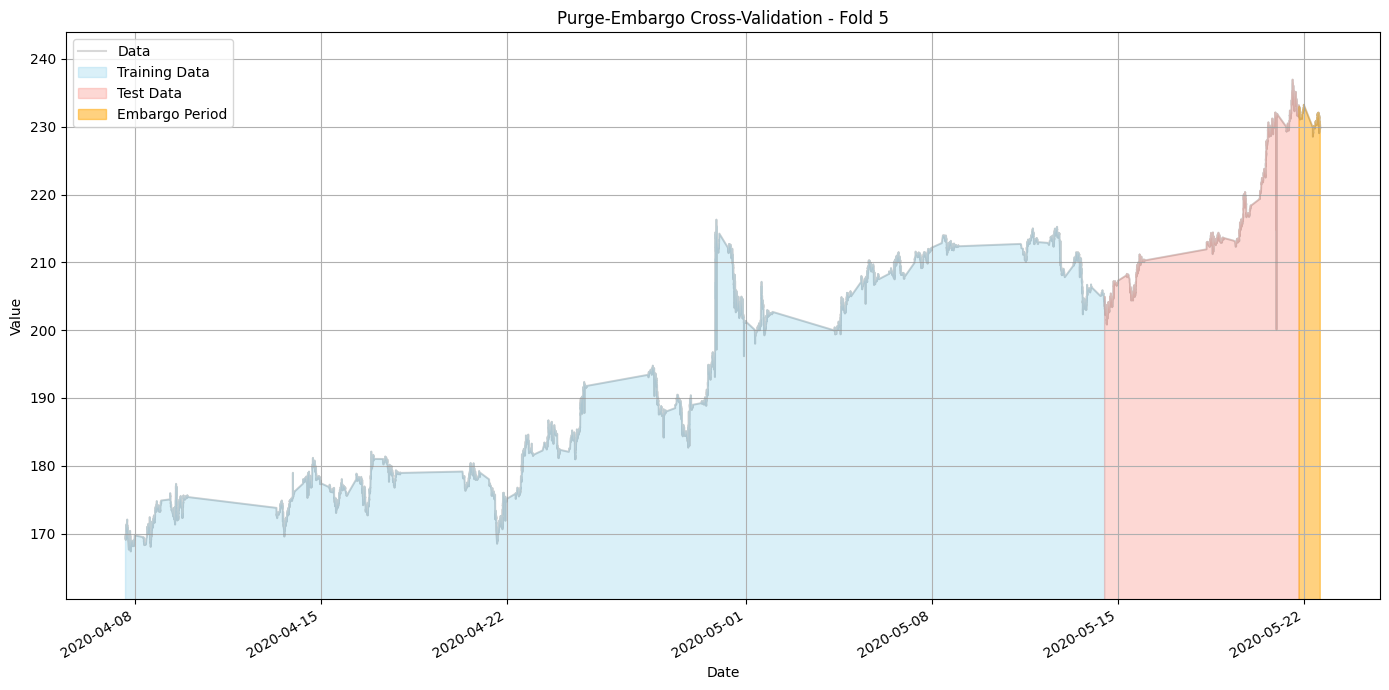

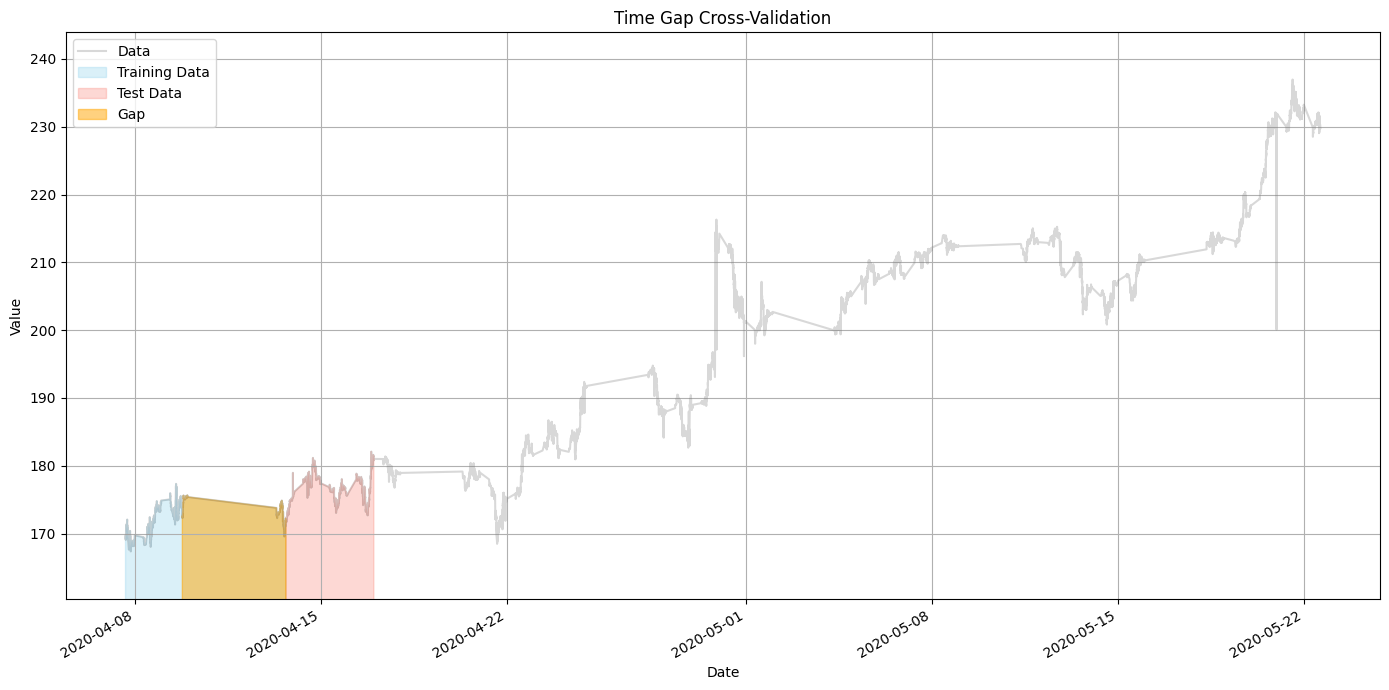

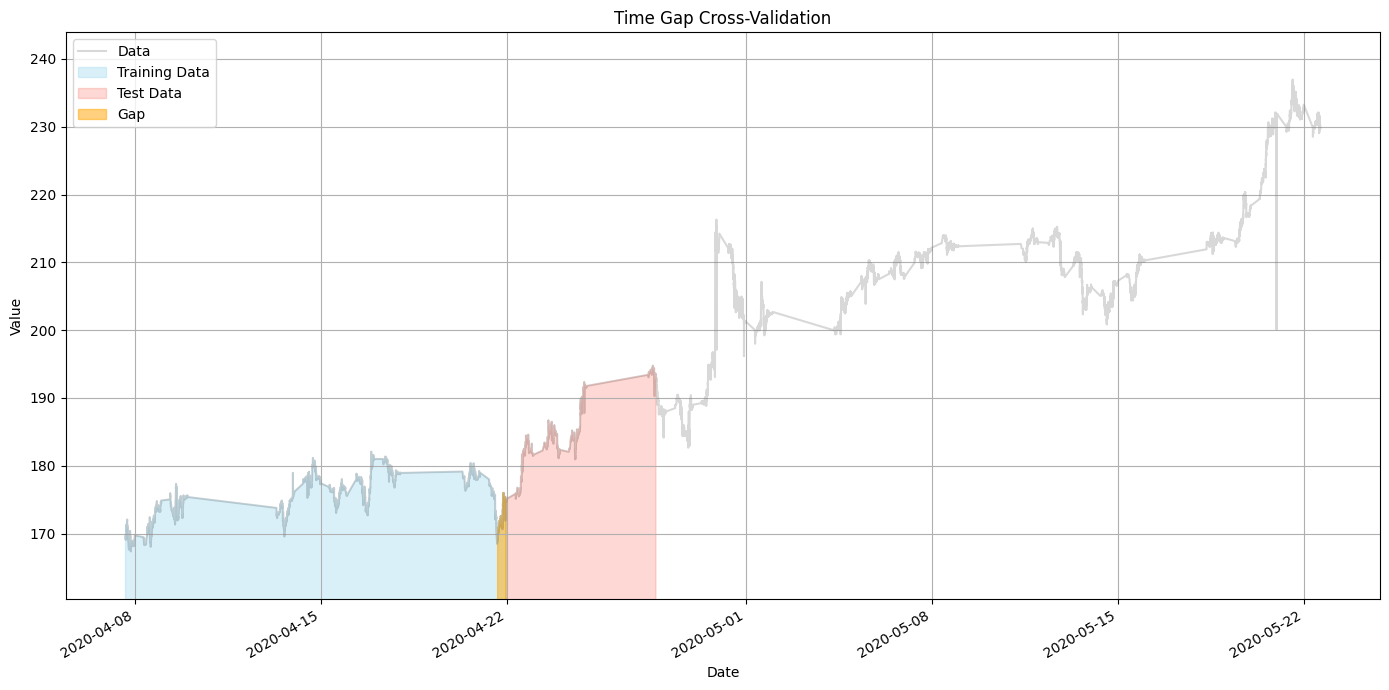

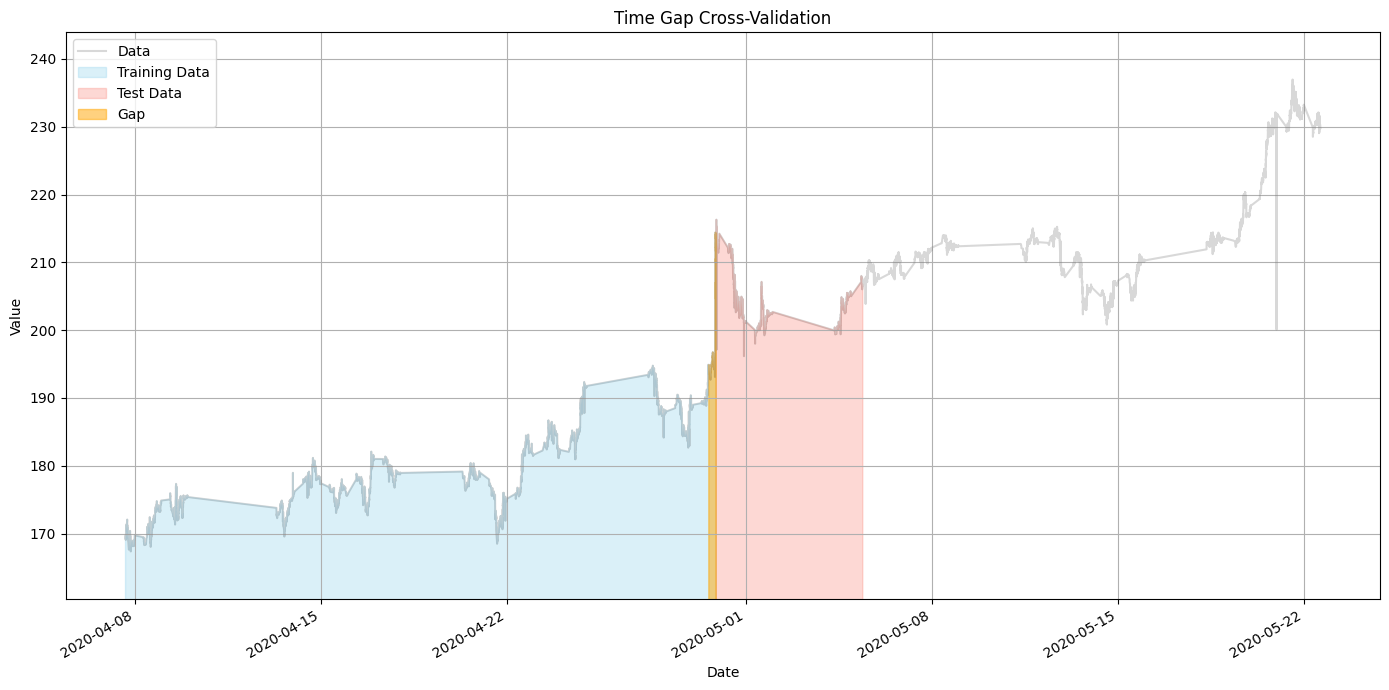

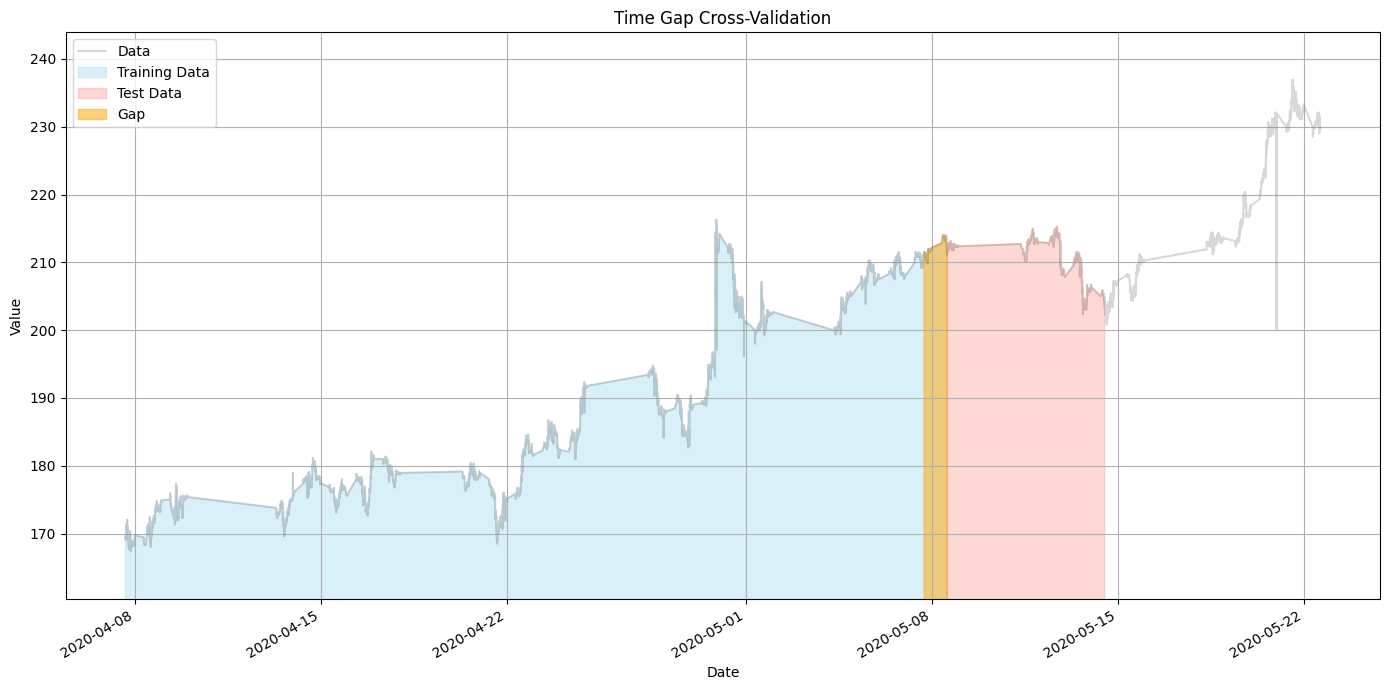

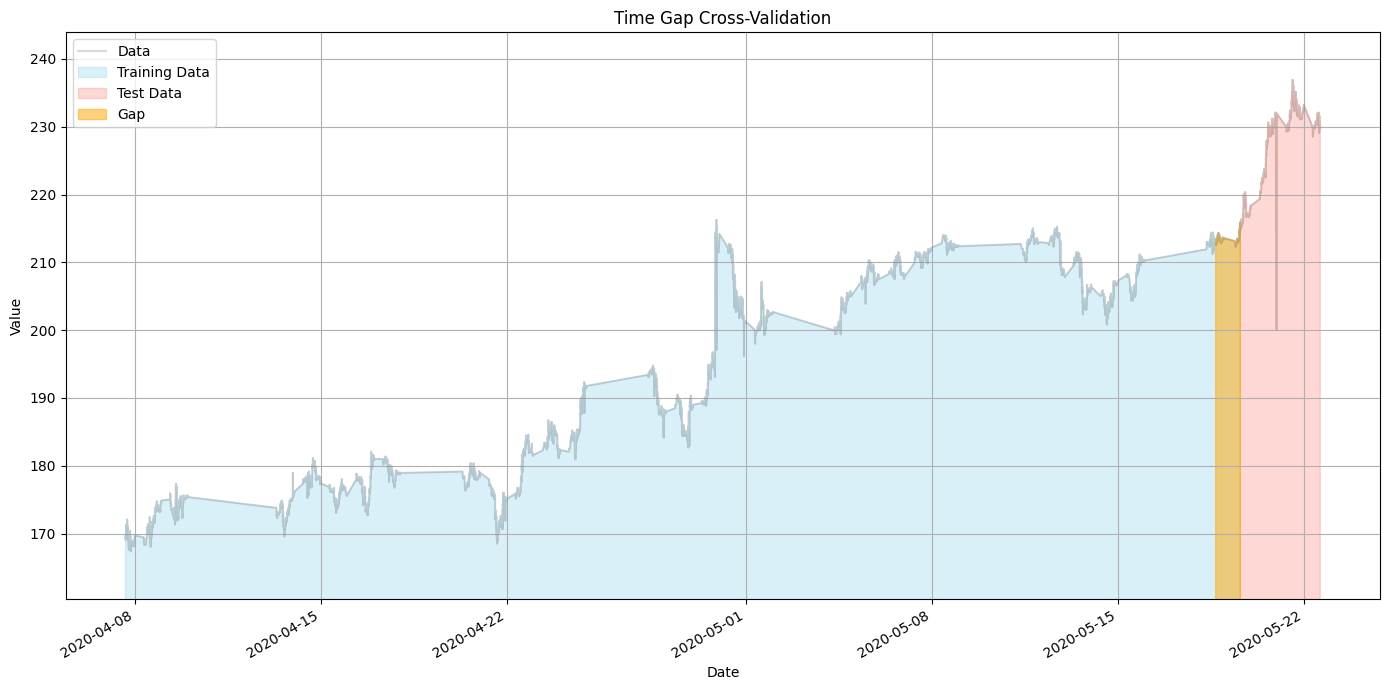

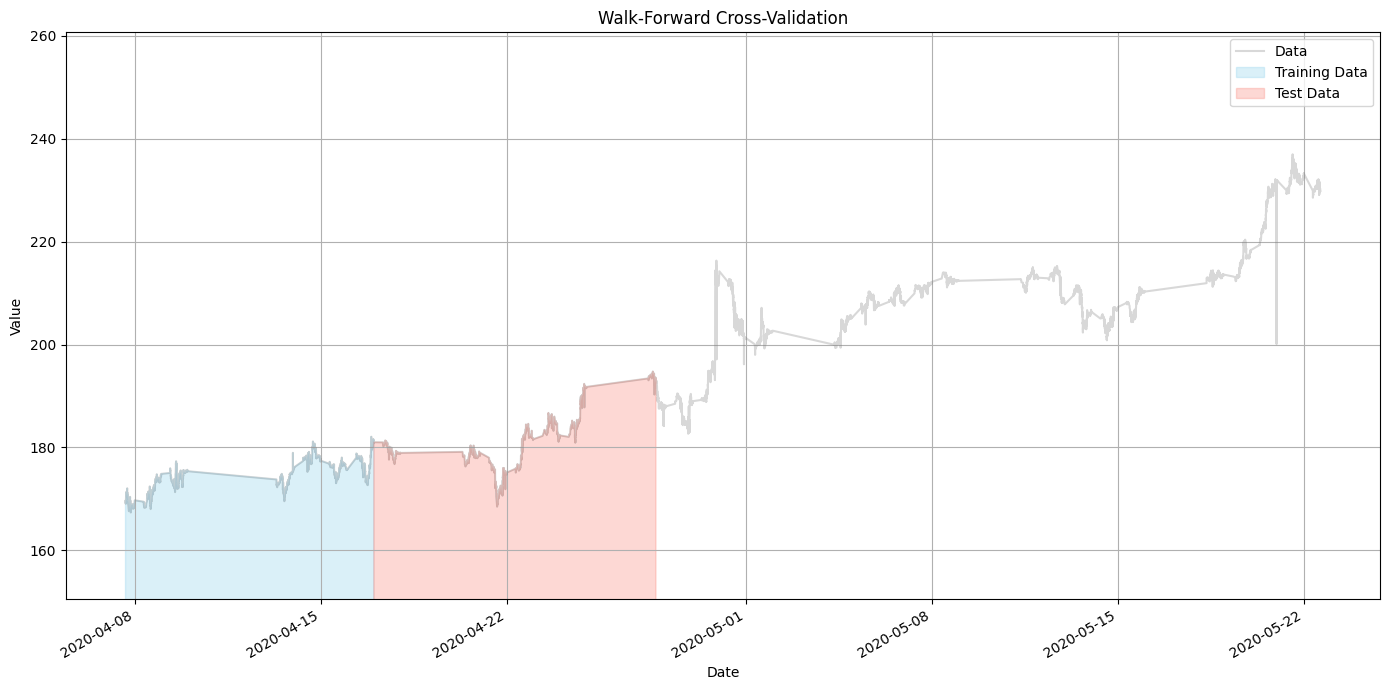

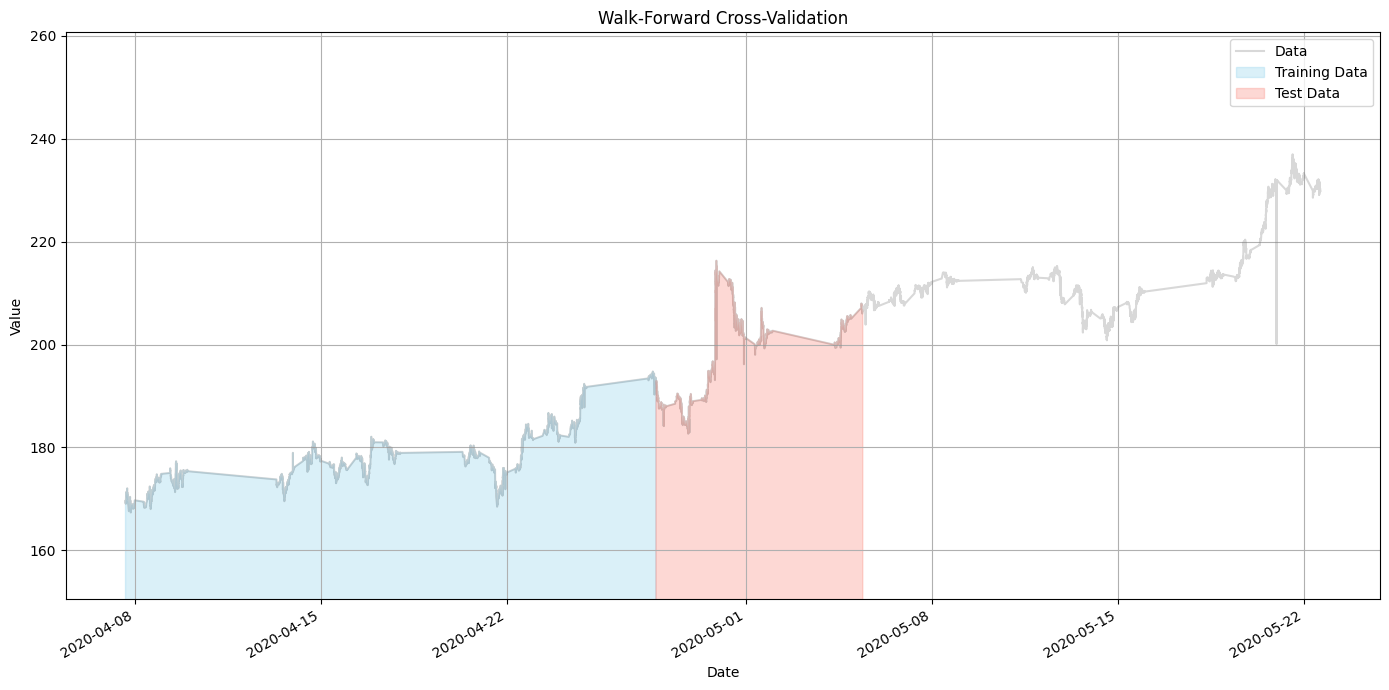

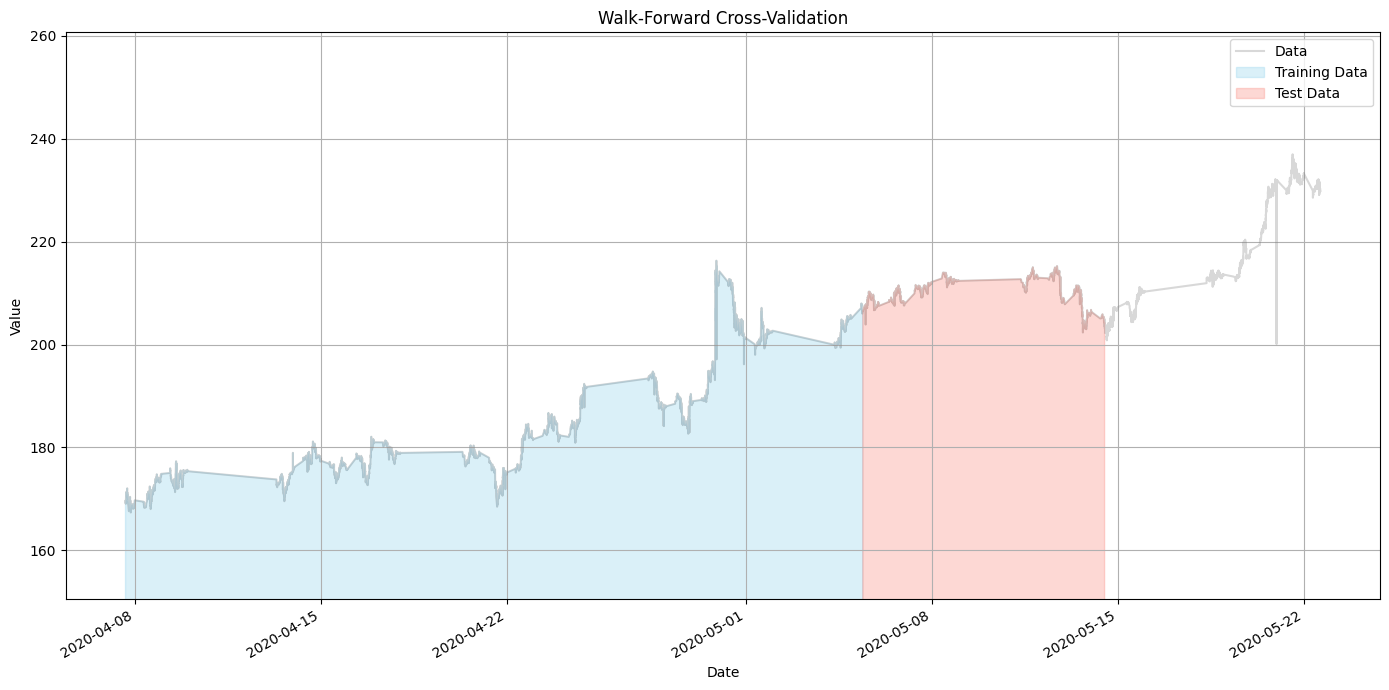

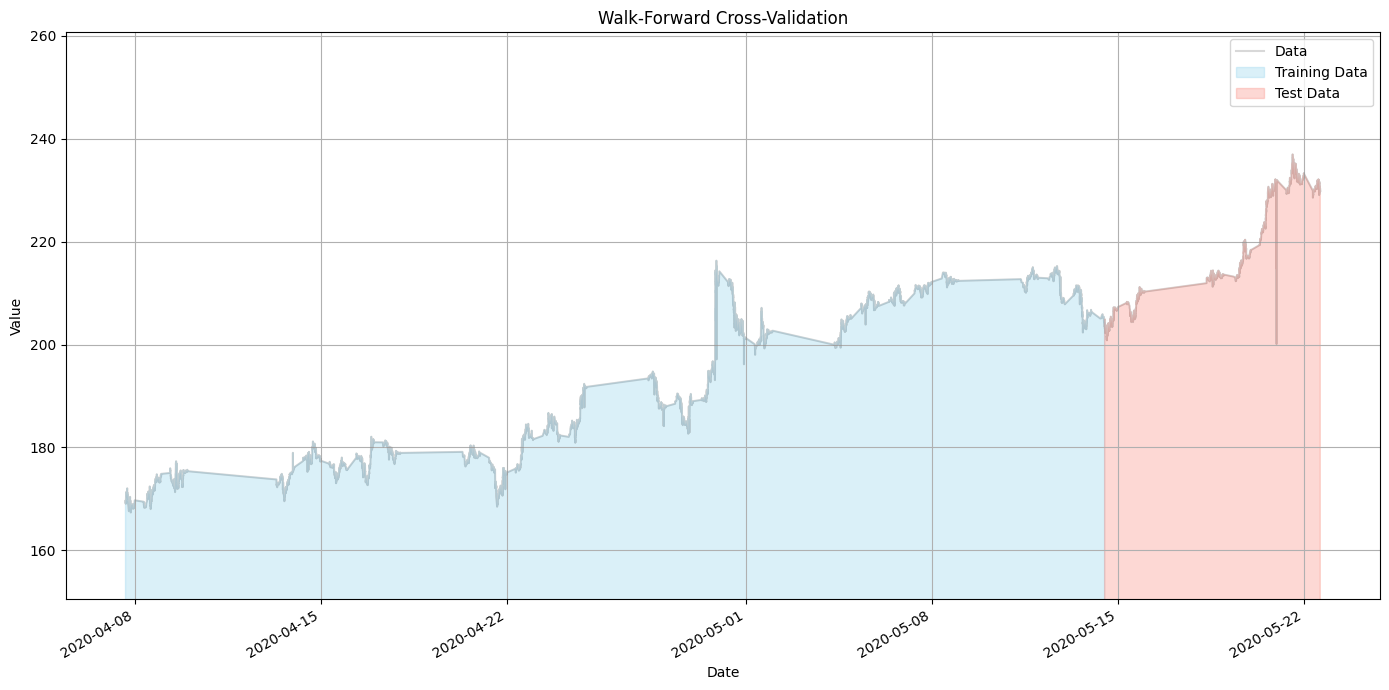

Running evaluations for alpha=0.1
here
True


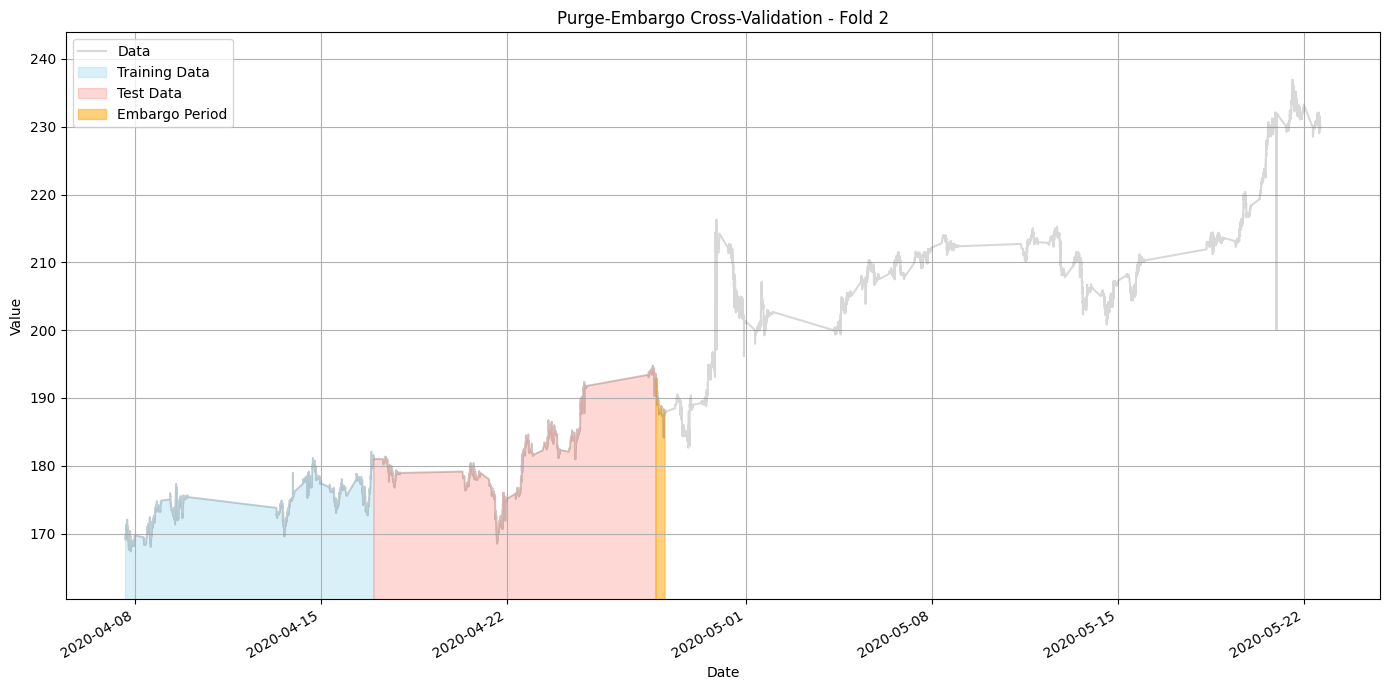

True


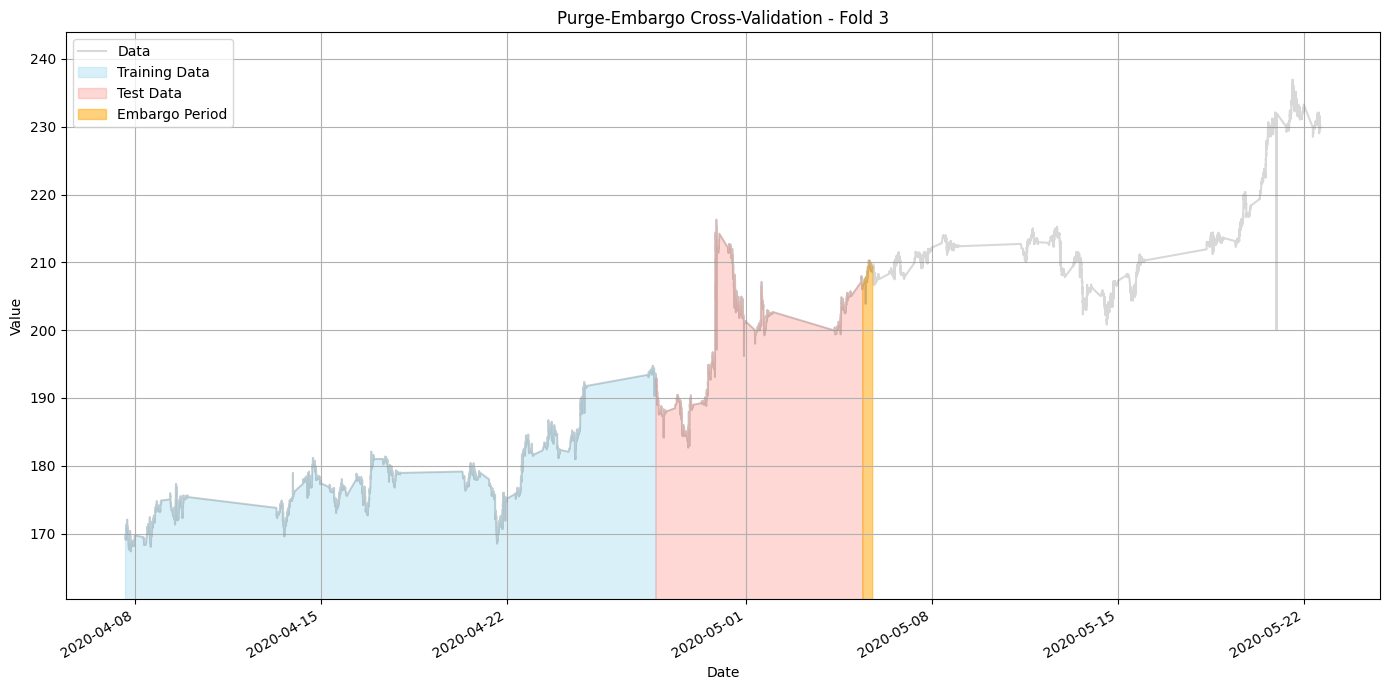

True


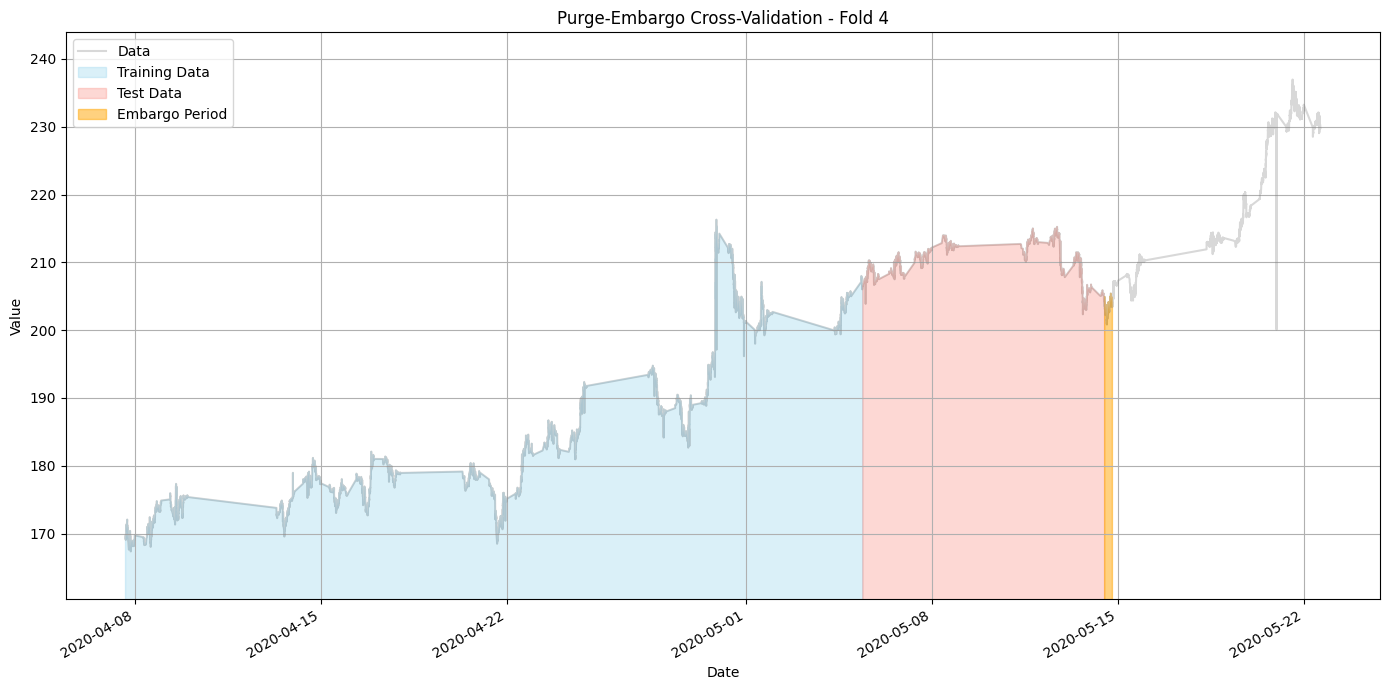

True


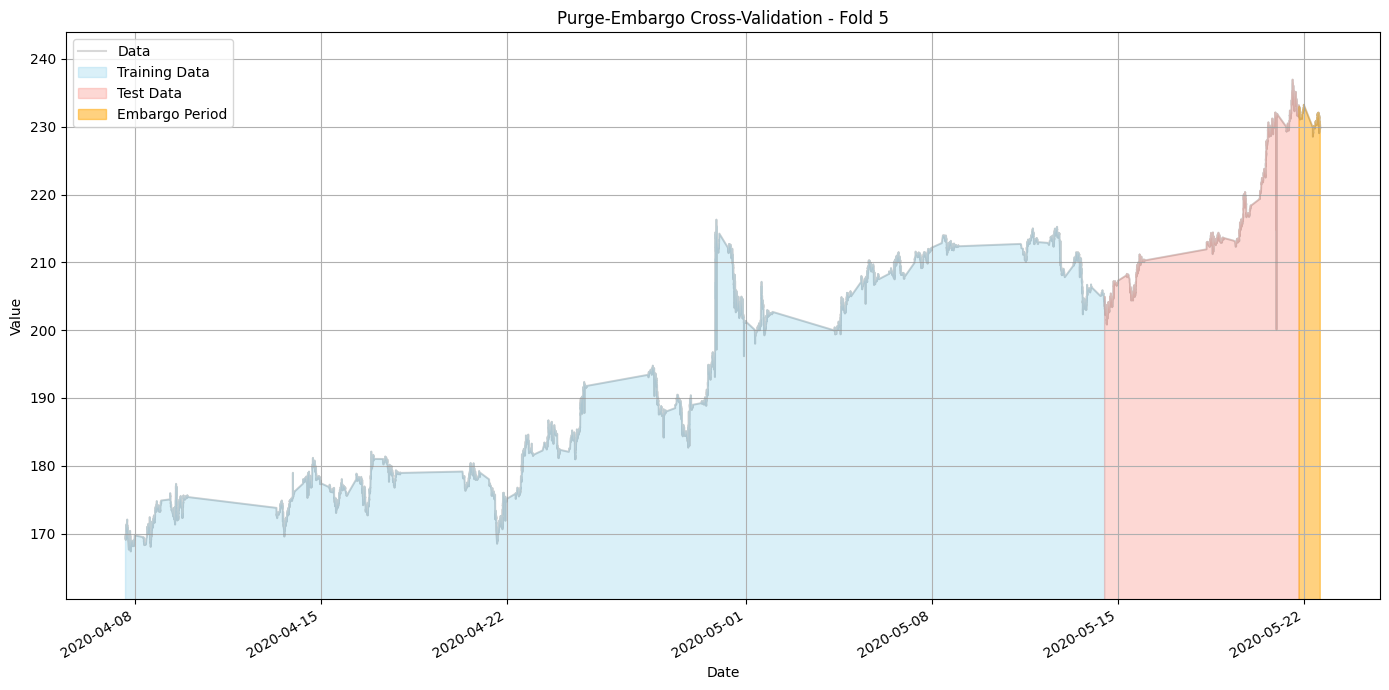

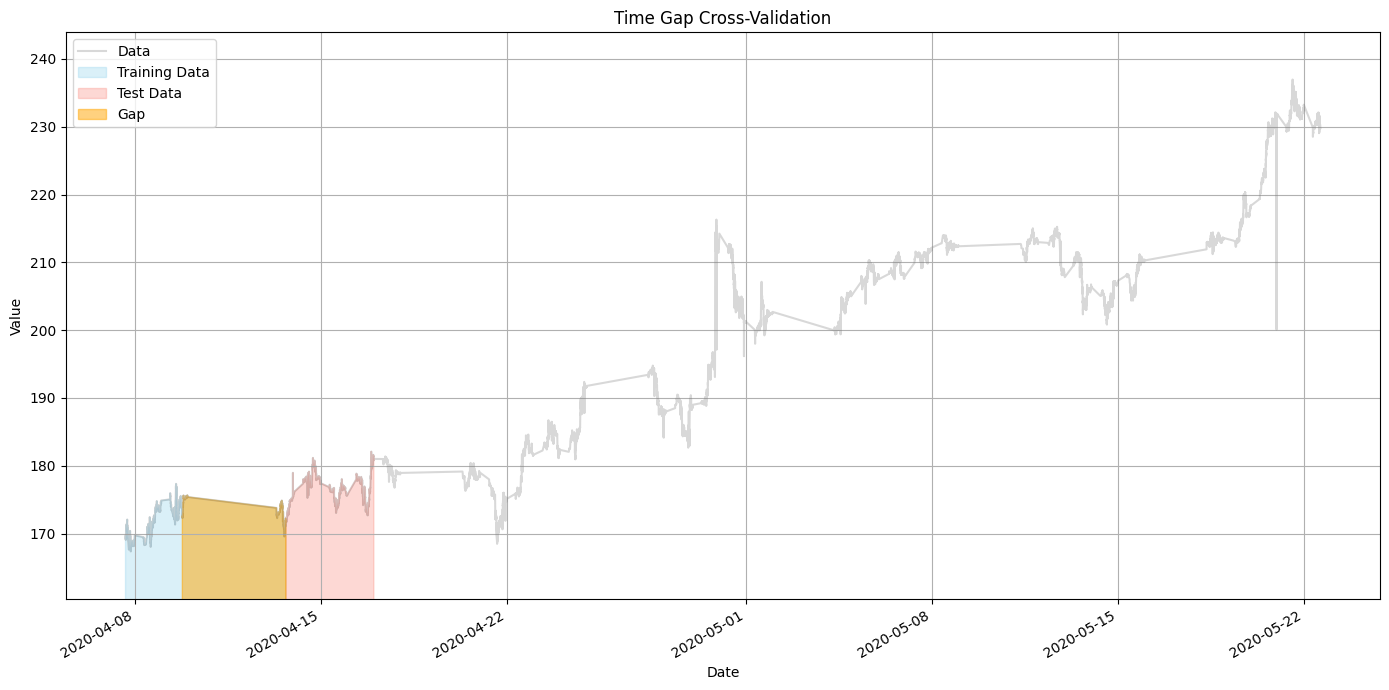

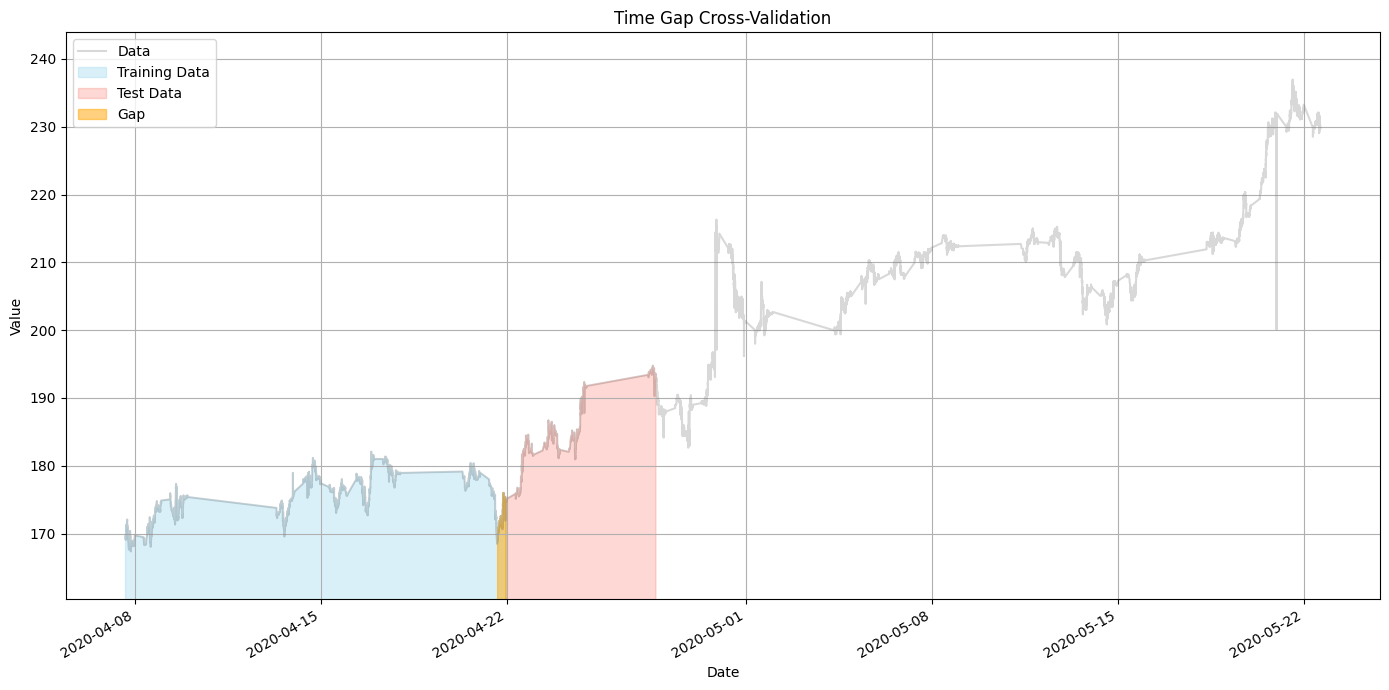

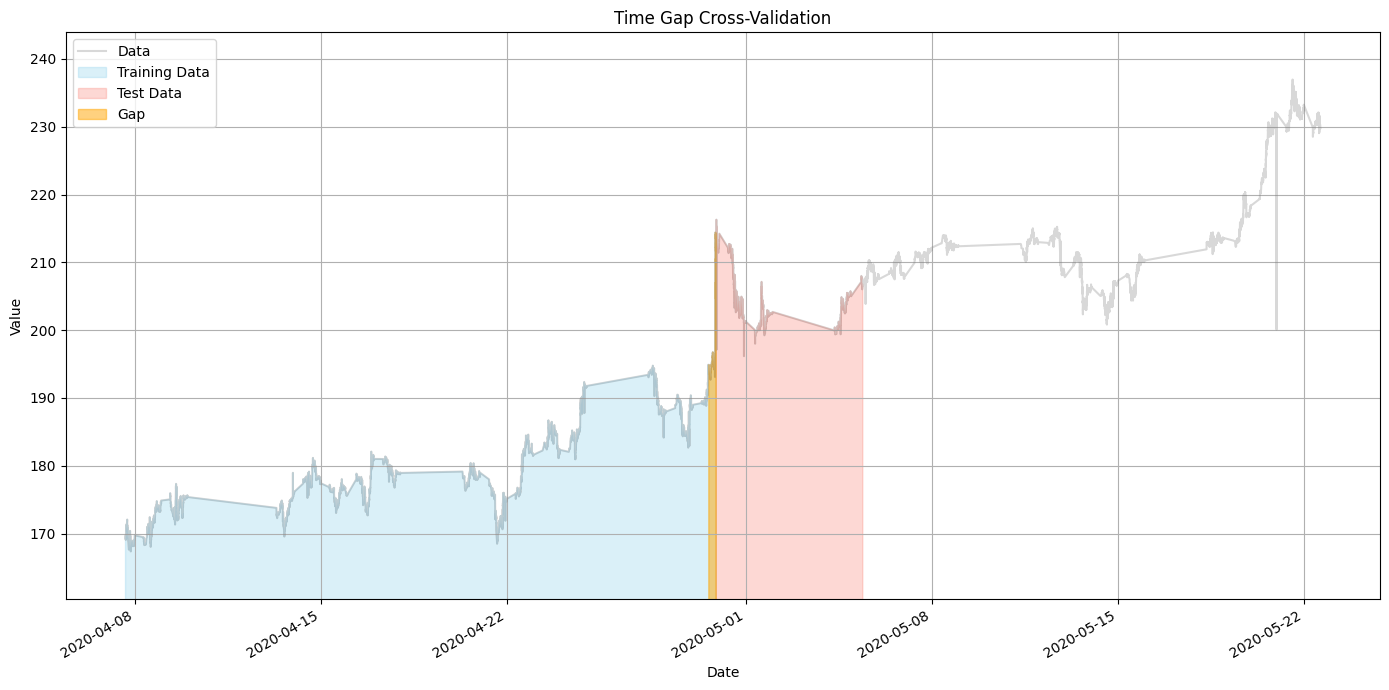

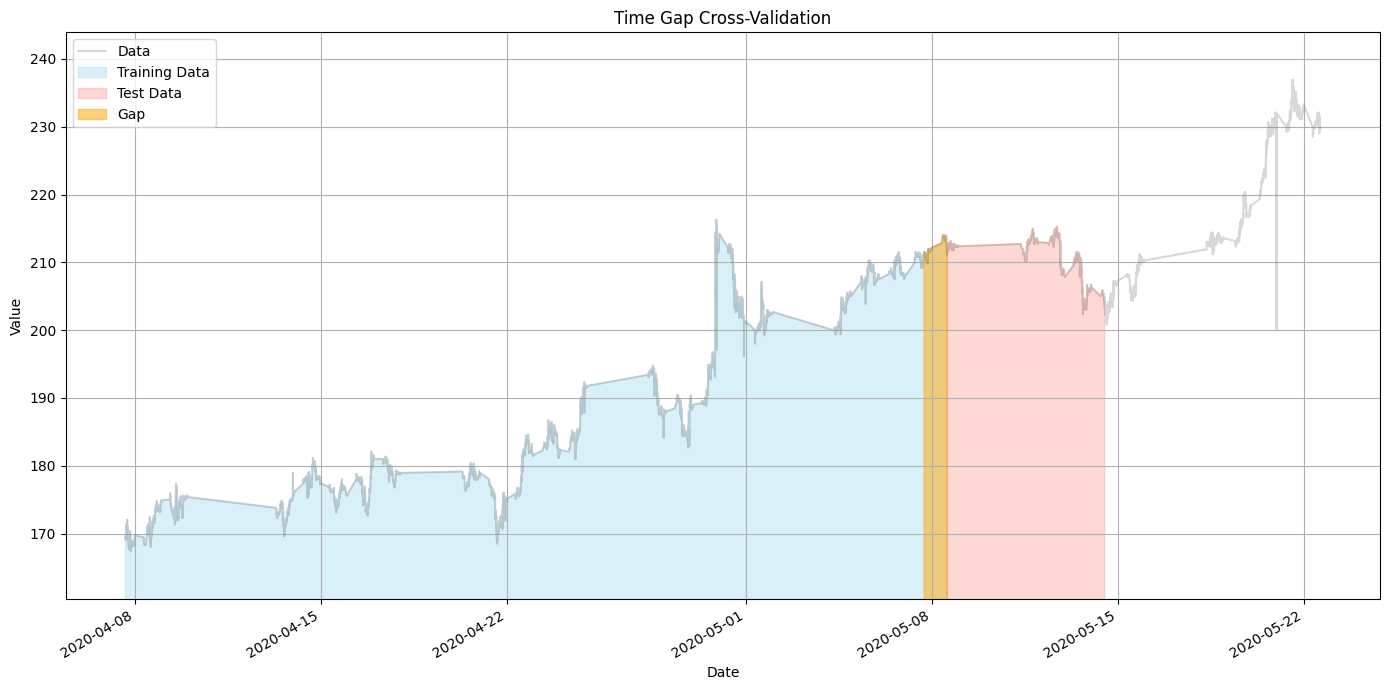

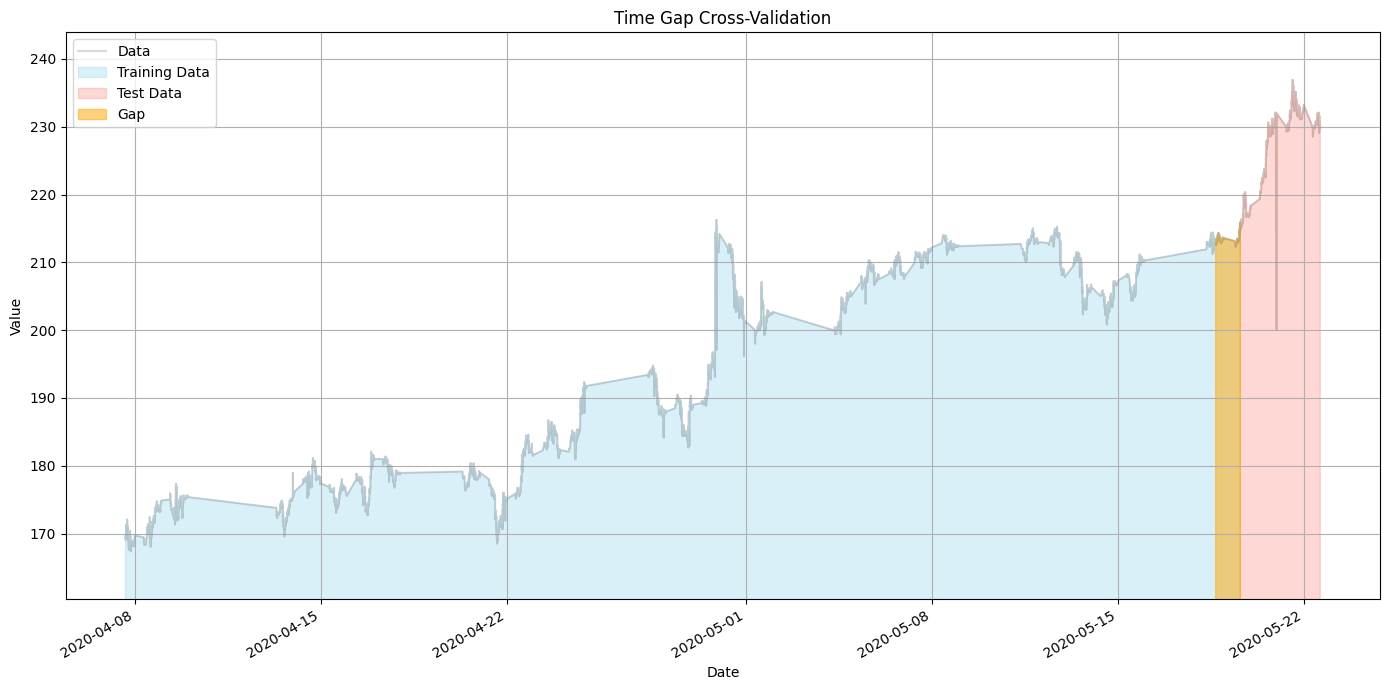

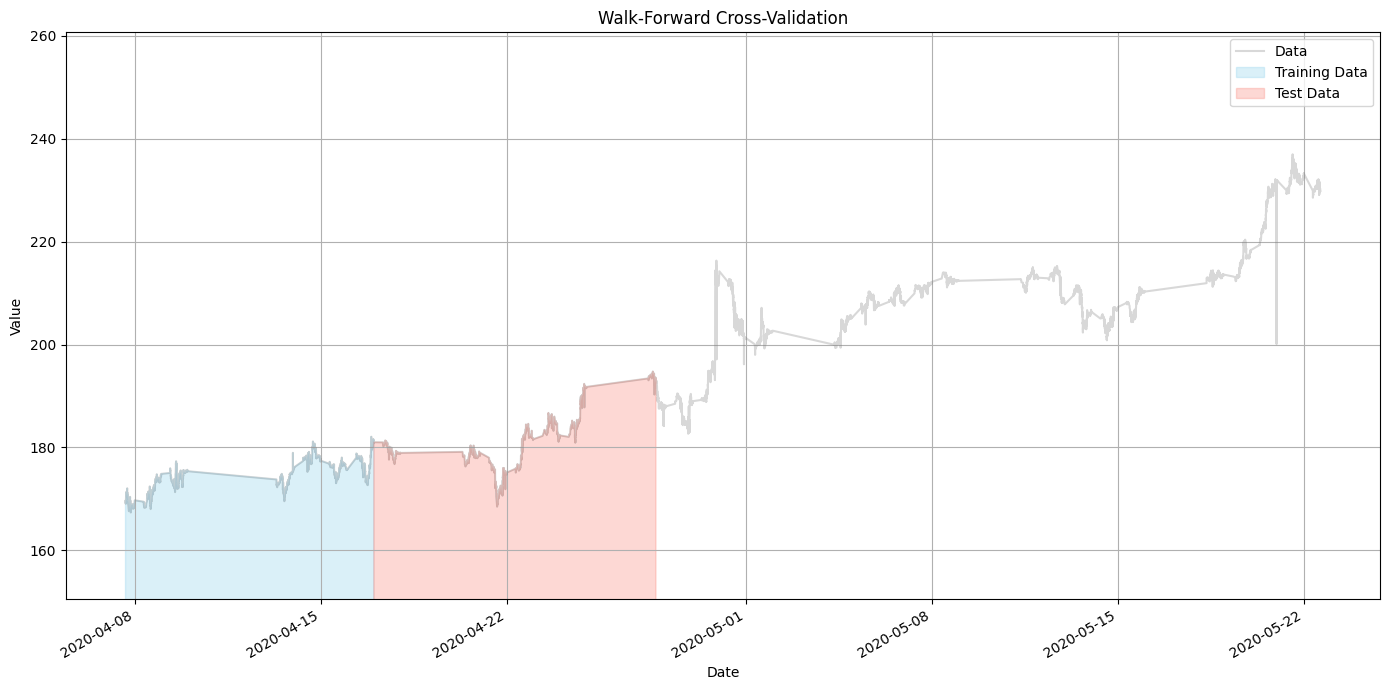

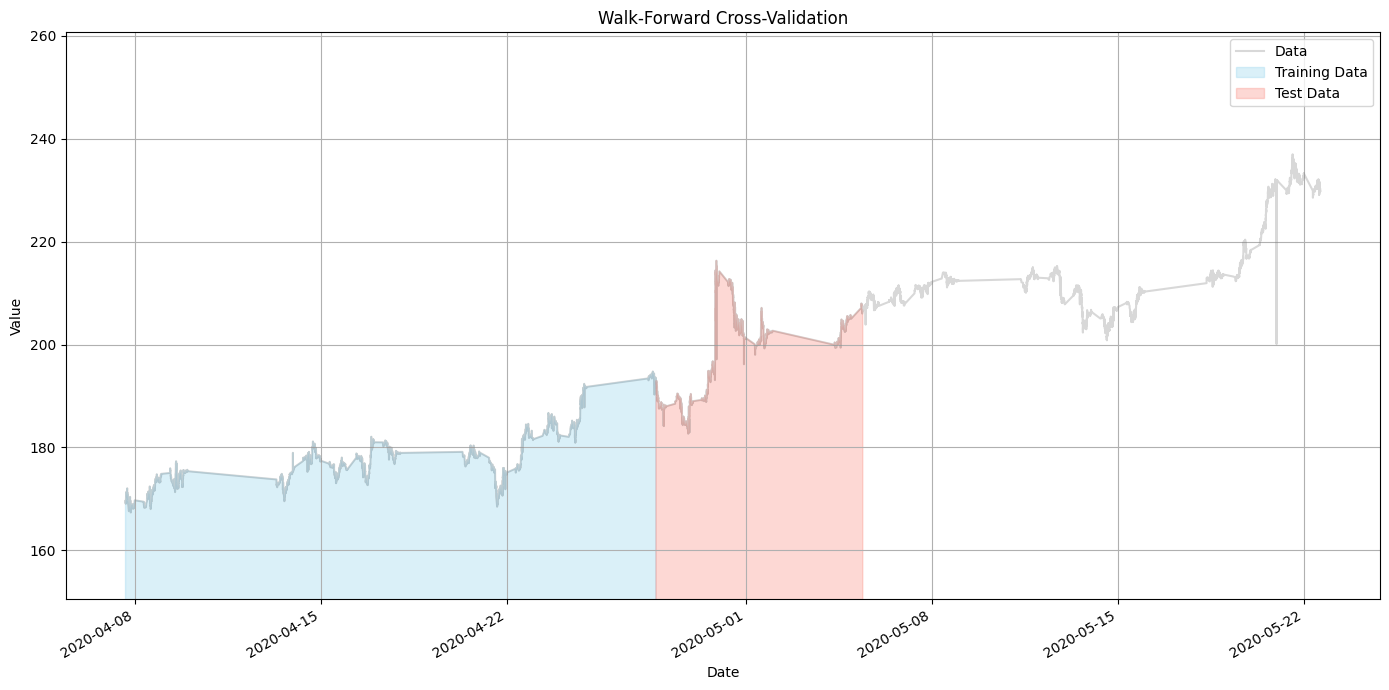

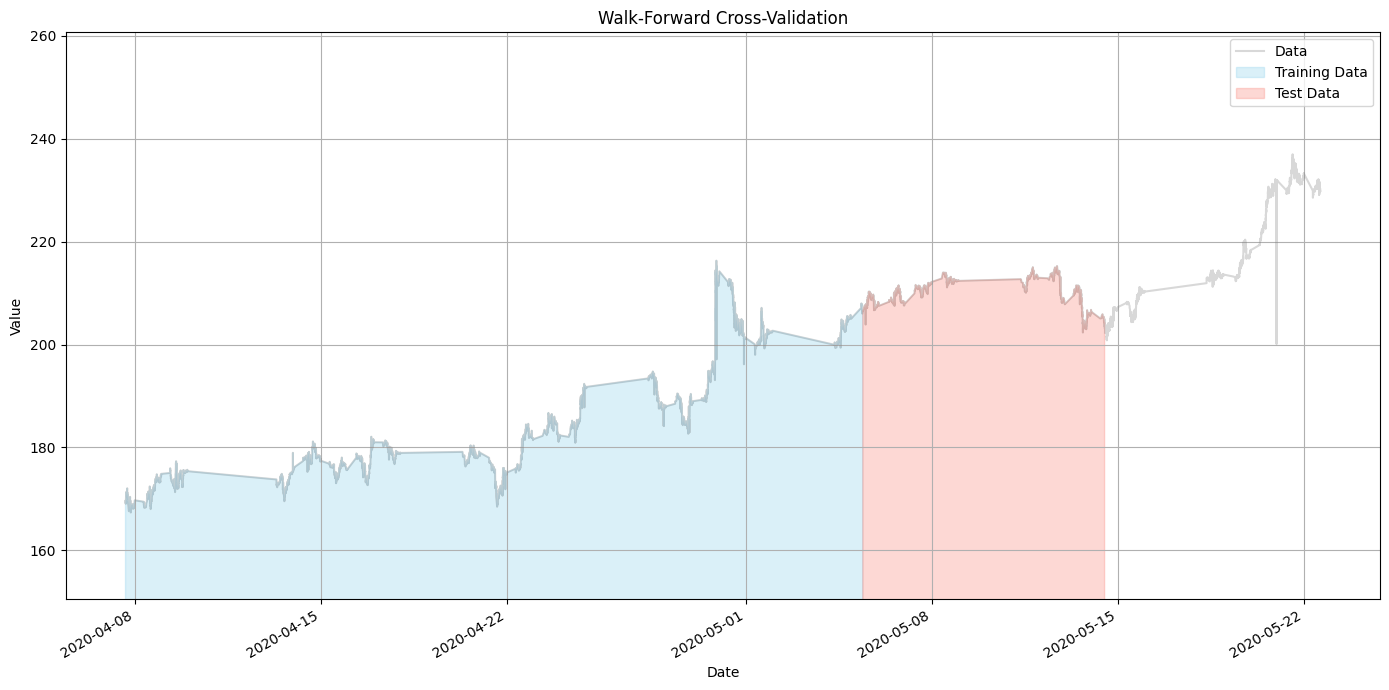

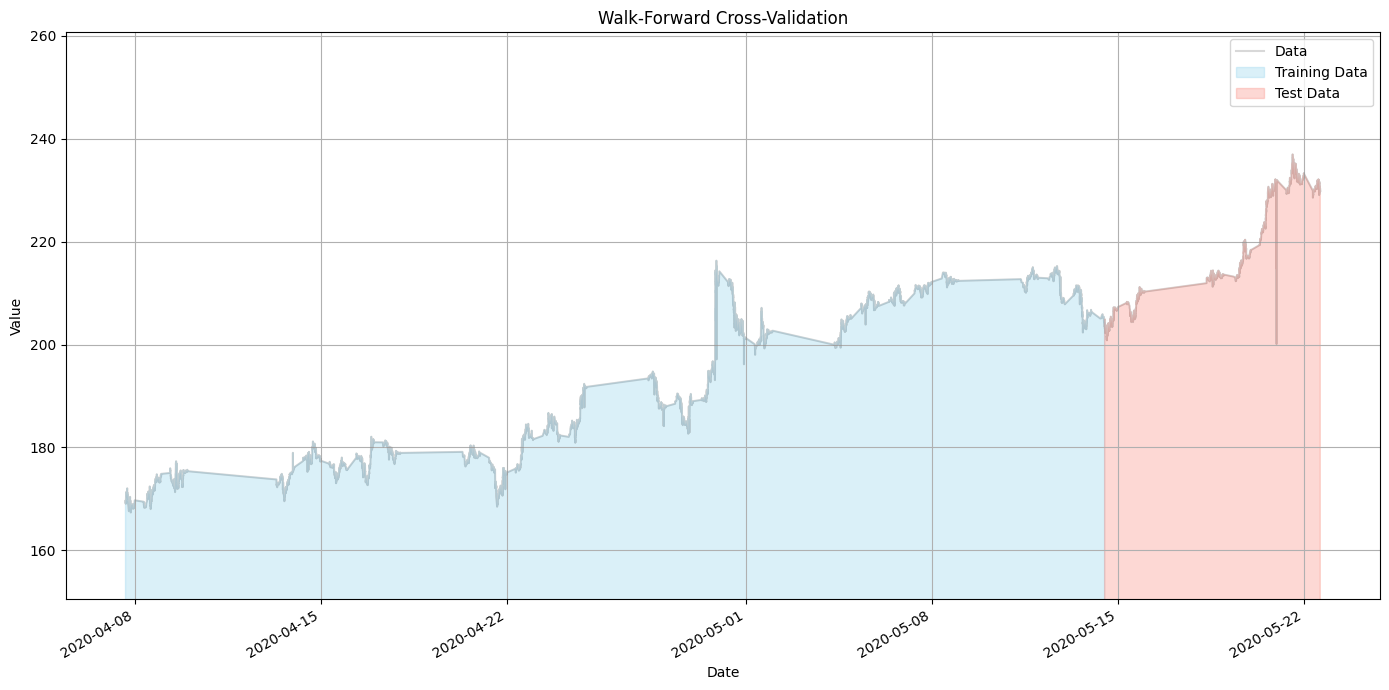

In [51]:

alphas = [0.01, 0.1]
results = {}

for alpha in alphas:
    print(f"Running evaluations for alpha={alpha}")
    results[alpha] = {
        'Purged Embargo CV': run_purged_embargo_cv(alpha, plot=True),
        'Time Gap CV': run_time_gap_cv(alpha, plot=True),
        'Walk Forward CV': run_walk_forward_cv(alpha, plot=True)
    }


## Comparing and Visualizing Results
Comparing the performance of different cross-validation techniques for each alpha value. Visualization code can be added here.


In [52]:

from prettytable import PrettyTable

# Your code for evaluation_metrics, run_time_gap_cv, alphas, and results here...

# Create a PrettyTable instance with column headers
table = PrettyTable()
table.field_names = ['Alpha', 'CV Type', 'Metric', 'Mean Score']

# Iterate over the results for each alpha
for alpha, result in results.items():
    for cv_type, metrics_dict in result.items():
        for metric, scores in metrics_dict.items():
            mean_score = sum(scores) / len(scores)
            table.add_row([alpha, cv_type, metric, mean_score])

# Print the pretty table
print(table)


+-------+-------------------+---------------------+---------------------+
| Alpha |      CV Type      |        Metric       |      Mean Score     |
+-------+-------------------+---------------------+---------------------+
|  0.01 | Purged Embargo CV |  mean_squared_error |  0.1502204601175467 |
|  0.01 | Purged Embargo CV | mean_absolute_error | 0.06953065082139873 |
|  0.01 | Purged Embargo CV |       r2_score      |  0.9980604966780295 |
|  0.01 | Purged Embargo CV |      max_error      |  13.92969536441089  |
|  0.01 |    Time Gap CV    |  mean_squared_error |  0.1916657427861676 |
|  0.01 |    Time Gap CV    | mean_absolute_error |  0.0683402361170707 |
|  0.01 |    Time Gap CV    |       r2_score      |  0.9926466336812563 |
|  0.01 |    Time Gap CV    |      max_error      |  11.345036168148875 |
|  0.01 |  Walk Forward CV  |  mean_squared_error | 0.13904444774125202 |
|  0.01 |  Walk Forward CV  | mean_absolute_error | 0.06860129873018136 |
|  0.01 |  Walk Forward CV  |       r2


## Conclusion
Summarize the findings and insights from the Time Gap Cross Validation evaluations.
